In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seed=3
np.random.seed(seed)

from keras.layers import Input, Dense
from keras.models import Model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Concatenate, concatenate
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
labels_df = pd.read_csv('product_attributes_updated.csv', encoding='utf-8', 
                    dialect='excel', lineterminator='\n')

In [3]:
labels_df = labels_df.drop(labels_df[labels_df.Style1=='Southwestern'].index)
labels_df = labels_df.drop(labels_df[labels_df.Style3=='Southwestern'].index)
labels_df = labels_df.drop(labels_df[labels_df.Style1=='French Country'].index)
labels_df = labels_df.drop(labels_df[labels_df.Style2=='French Country'].index)

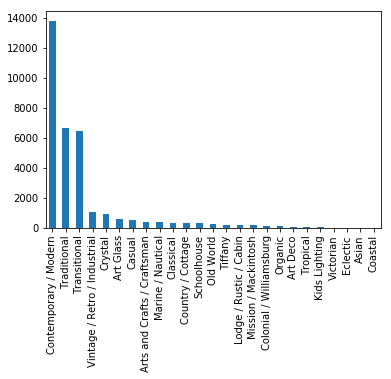

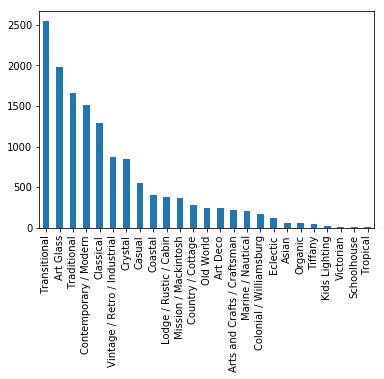

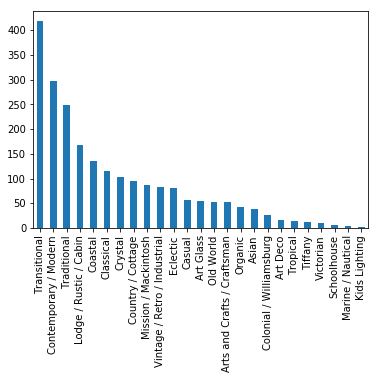

In [4]:
for ColumnName in ['Style1','Style2','Style3']:
    labels_df[ColumnName].value_counts().plot(kind="bar")
    plt.show()

In [5]:
one_hot1=pd.get_dummies(labels_df['Style1'])
one_hot2=pd.get_dummies(labels_df['Style2'])
one_hot3=pd.get_dummies(labels_df['Style3'])
Style_labels=one_hot1+one_hot2+one_hot3
Style_labels['Id']=labels_df['ProductID']
Style_labels.isnull().sum()

Art Deco                        0
Art Glass                       0
Arts and Crafts / Craftsman     0
Asian                           0
Casual                          0
Classical                       0
Coastal                         0
Colonial / Williamsburg         0
Contemporary / Modern           0
Country / Cottage               0
Crystal                         0
Eclectic                        0
Kids Lighting                   0
Lodge / Rustic / Cabin          0
Marine / Nautical               0
Mission / Mackintosh            0
Old World                       0
Organic                         0
Schoolhouse                     0
Tiffany                         0
Traditional                     0
Transitional                    0
Tropical                        0
Victorian                       0
Vintage / Retro / Industrial    0
Id                              0
dtype: int64

In [6]:
key_words=['Bronze','Brown','Satin','Chrome','Black','Brass','Gold','Polished','White','Silver','Copper','Nickel','Sconces','Bathroom','Outdoor','Pendant','Mini-Pendant','Chandeliers','Table','Flushmount','Semi-Flushmount','Multi-Light','Post','Swing','Mini-Chandeliers','Hanging','Island','Floor','Crystal','Wall','Sconce','Lamp']
dummy=[0]*(len(key_words))
len(dummy)==len(key_words)

True

In [7]:
 def image2np_array( filename ) :
    img = Image.open( filename )
    img.load()
    data = np.asarray( img, dtype='uint8' )
    return data
x_train_list=[]
y_train_list=[]
found_key_words_list=[]

Style_labels['sum'] = Style_labels.sum(axis=1)


for row in Style_labels.itertuples():
    if (row[27]!=0):
        try:
            img = image2np_array('..\\ml_150x150\\'+row[26]+'.jpg')
        except (IOError, ValueError) as e:
            print('{0}'.format(e))
            continue
        dummy=[0]*(len(key_words))
        for x in key_words:
            try:
                if x in row[8].split(): 
                    dummy[key_words.index(x)]=1
            except AttributeError:
                continue
        found_key_words_list.append(dummy)
        x_train_list.append(img)
        y_train_list.append(Style_labels.loc[row[0],:'Vintage / Retro / Industrial'].values)

[Errno 2] No such file or directory: '..\\ml_150x150\\P1017767.jpg'
[Errno 2] No such file or directory: '..\\ml_150x150\\P1239025.jpg'
[Errno 2] No such file or directory: '..\\ml_150x150\\P252805.jpg'
[Errno 2] No such file or directory: '..\\ml_150x150\\P702584.jpg'
[Errno 2] No such file or directory: '..\\ml_150x150\\P702586.jpg'
[Errno 2] No such file or directory: '..\\ml_150x150\\P867134.jpg'


In [8]:
x_train=np.array(x_train_list)
y_train=np.array(y_train_list)
found_key_words=np.array(found_key_words_list)
y_train.shape

(33331, 25)

In [9]:
epochs = 5
batch_size = 32

input_img = Input(shape=(150, 150, 3))


x=Conv2D(32,(5,5), activation='relu')(input_img)
x=Conv2D(32,(5,5), activation='relu')(x)
x=MaxPooling2D((4, 4), strides=(2, 2), padding='same')(x)

x=Conv2D(32,(5,5), activation='relu')(x)
x=Conv2D(32,(5,5), activation='relu')(x)
x=MaxPooling2D((4, 4), strides=(2, 2), padding='same')(x)

x=Conv2D(32,(5,5), activation='relu')(x)
x=Conv2D(32,(5,5), activation='relu')(x)
x=MaxPooling2D((4, 4), strides=(2, 2), padding='same')(x)

tower_1 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
tower_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
tower_2 = Conv2D(32, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
tower_3 = Conv2D(32, (1, 1), padding='same', activation='relu')(tower_3)

aux_output1 = concatenate([tower_1, tower_2, tower_3], axis=1)

features=Flatten()(aux_output1)

extra = Input(shape=(len(key_words),))

x=concatenate([features, extra], axis=1)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5,seed=seed)(x)
x = Dense(128, activation='relu')(x)
output3=Dense(25, activation='sigmoid')(x)
 
end_model = Model(inputs=[input_img,extra], outputs=output3)
end_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
end_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 150, 150, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 146, 146, 32)  2432        input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 142, 142, 32)  25632       conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 71, 71, 32)    0           conv2d_2[0][0]                   
___________________________________________________________________________________________

In [10]:
end_model.fit([x_train,found_key_words], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 26664 samples, validate on 6667 samples
Epoch 1/5
26664/26664 [==============================] - 109s - loss: 0.1809 - acc: 0.9384 - val_loss: 0.1415 - val_acc: 0.9495
Epoch 2/5
26664/26664 [==============================] - 104s - loss: 0.1522 - acc: 0.9474 - val_loss: 0.1373 - val_acc: 0.9522
Epoch 3/5
26664/26664 [==============================] - 104s - loss: 0.1448 - acc: 0.9493 - val_loss: 0.1346 - val_acc: 0.9502
Epoch 4/5
26664/26664 [==============================] - 103s - loss: 0.1379 - acc: 0.9512 - val_loss: 0.1296 - val_acc: 0.9530
Epoch 5/5
26664/26664 [==============================] - 103s - loss: 0.1324 - acc: 0.9532 - val_loss: 0.1291 - val_acc: 0.9520


In [11]:
end_model.save('style_classifier.h5')